# HoloViz - Panel Example

**Getting Started Docs:** https://panel.holoviz.org/getting_started/index.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Load Sample Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv')

In [3]:
data.head(3)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132


In [4]:
data['date'] = pd.to_datetime(data['year'].astype(str) + data['month'], format='%Y%B')
data['month'] = data['month'].apply(lambda x: datetime.strptime(x, '%B').month)
data = data.set_index('date')
data.head(3)

,year,month,passengers
date,,,
1949-01-01,1949,1,112
1949-02-01,1949,2,118
1949-03-01,1949,3,132


## Use Panel

In [5]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='passengers', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

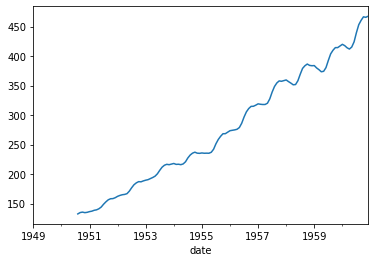

In [6]:
find_outliers(variable='passengers', window=20, sigma=10)

## Interactive Panels

Column
    [0] Column
        [0] Select(name='variable', options=['month', 'passengers', ...], value='passengers')
        [1] IntSlider(end=60, name='window', start=1, value=30)
        [2] IntSlider(end=20, name='sigma', start=1, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00099')
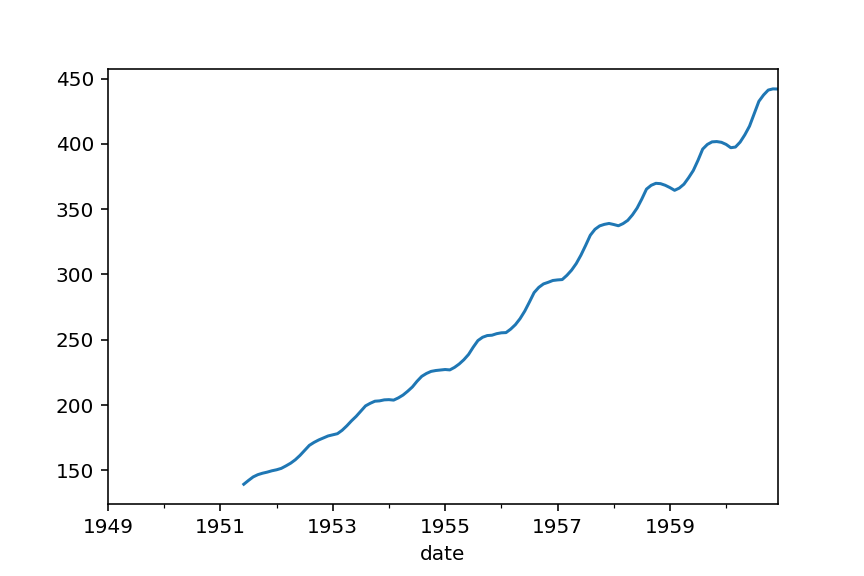

In [7]:
import panel as pn
pn.extension()

kwargs = dict(
    window=(1, 60), 
    variable=sorted(list(data.columns)), 
    sigma=(1, 20)
)
pn.interact(find_outliers, **kwargs)